<a href="https://colab.research.google.com/github/deril2605/deepseek-ocr-2-testing-fine-tuning/blob/main/Basic_Deepseek_OCR_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference - https://dev.to/czmilo/deepseek-ocr-2-complete-guide-to-running-fine-tuning-in-2026-3odb

In [1]:
%%capture
import os, re
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    # Do this only in Colab notebooks! Otherwise use pip install unsloth
    import torch; v = re.match(r"[0-9]{1,}\.[0-9]{1,}", str(torch.__version__)).group(0)
    xformers = "xformers==" + ("0.0.33.post1" if v=="2.9" else "0.0.32.post2" if v=="2.8" else "0.0.29.post3")
    !pip install --no-deps bitsandbytes accelerate {xformers} peft trl triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf "datasets==4.3.0" "huggingface_hub>=0.34.0" hf_transfer
    !pip install --no-deps unsloth
!pip install transformers==4.56.2
!pip install --no-deps trl==0.22.2
!pip install jiwer
!pip install einops addict easydict

In [2]:
from huggingface_hub import snapshot_download
snapshot_download("unsloth/DeepSeek-OCR", local_dir = "deepseek_ocr")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

'/content/deepseek_ocr'

In [3]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch
from transformers import AutoModel
import os
os.environ["UNSLOTH_WARN_UNINITIALIZED"] = '0'
# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Qwen3-VL-8B-Instruct-bnb-4bit", # Qwen 3 vision support
    "unsloth/Qwen3-VL-8B-Thinking-bnb-4bit",
    "unsloth/Qwen3-VL-32B-Instruct-bnb-4bit",
    "unsloth/Qwen3-VL-32B-Thinking-bnb-4bit",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastVisionModel.from_pretrained(
    "./deepseek_ocr",
    load_in_4bit = False, # Use 4bit to reduce memory use. False for 16bit LoRA.
    auto_model = AutoModel,
    trust_remote_code=True,
    unsloth_force_compile=True,
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


Unsloth: WARNING `trust_remote_code` is True.
Are you certain you want to do remote code execution?
==((====))==  Unsloth 2026.1.4: Fast Deepseekocr patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.5.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.33.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


Unsloth: QLoRA and full finetuning all not selected. Switching to 16bit LoRA.


Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at ./deepseek_ocr and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


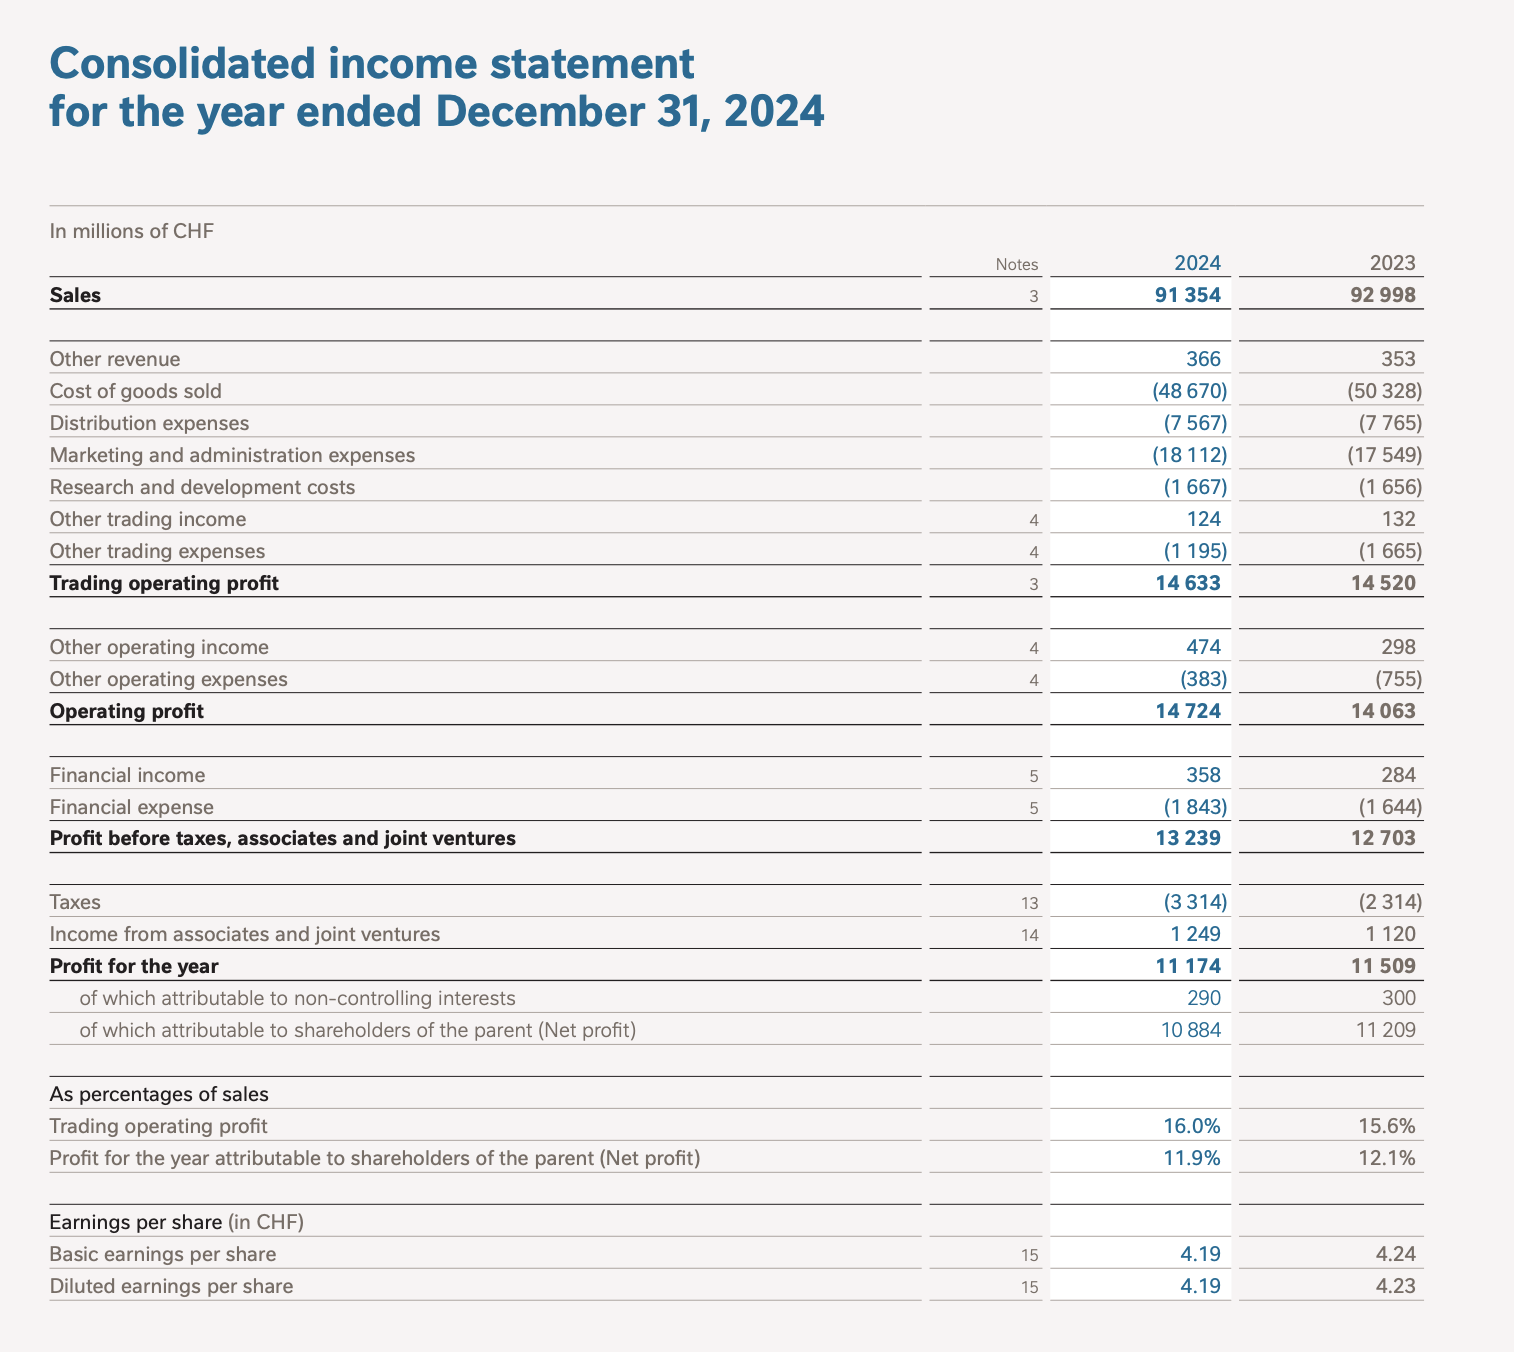

In [4]:
from IPython.display import Image, display

# For an image uploaded to your Colab session's filesystem
display(Image('/content/your/deepseek-ocr-test.png'))

## Free OCR

In [5]:
# prompt = "<image>\nFree OCR. "
prompt = "<image>\nFree OCR. "
image_file = '/content/your/deepseek-ocr-test.png'

output_path = 'your/output/dir'
# infer(self, tokenizer, prompt='', image_file='', output_path = ' ', base_size = 1024, image_size = 640, crop_mode = True, test_compress = False, save_results = False):

# Tiny: base_size = 512, image_size = 512, crop_mode = False
# Small: base_size = 640, image_size = 640, crop_mode = False
# Base: base_size = 1024, image_size = 1024, crop_mode = False
# Large: base_size = 1280, image_size = 1280, crop_mode = False

# Gundam: base_size = 1024, image_size = 640, crop_mode = True

res = model.infer(tokenizer, prompt=prompt, image_file=image_file, output_path = output_path, base_size = 1024, image_size = 640, crop_mode=True, save_results = True, test_compress = False)


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
## Consolidated income statement for the year ended December 31, 2024

| In millions of CHF | Notes | 2024 | 2023 |
|------------------|-------|------|------|
| **Sales**        |       | 91 354 | 92 998 |
| Other revenue     |       | 366  | 353  |
| Cost of goods sold|       | (48 670) | (50 328) |
| Distribution expenses |       | (7 567) | (7 765) |
| Marketing and administration expenses |       | (18 112) | (17 549) |
| Research and development costs |       | (1 667) | (1 656) |
| Other trading income | 4     | 124  | 132  |
| Other trading expenses | 4     | (1 195) | (1 665) |
| **Trading operating profit** | 3     | 14 633 | 14 520 |
| Other operating income | 4     | 474  | 298  |
| Other operating expenses | 4     | (383) | (755) |
| **Operating profit** |       | 14 724 | 14 063 |
| Financial income | 5     | 358  | 284  |
| Financial expense | 5     | (1 843) | (1 644) |
| **Profit before taxes, associ

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


## Document Mode - Markdown

In [6]:
# prompt = "<image>\nFree OCR. "
prompt = "<image>\n<|grounding|>Convert the document to markdown. "
image_file = '/content/your/deepseek-ocr-test.png'

output_path = 'your/output/dir'
# infer(self, tokenizer, prompt='', image_file='', output_path = ' ', base_size = 1024, image_size = 640, crop_mode = True, test_compress = False, save_results = False):

# Tiny: base_size = 512, image_size = 512, crop_mode = False
# Small: base_size = 640, image_size = 640, crop_mode = False
# Base: base_size = 1024, image_size = 1024, crop_mode = False
# Large: base_size = 1280, image_size = 1280, crop_mode = False

# Gundam: base_size = 1024, image_size = 640, crop_mode = True

res = model.infer(tokenizer, prompt=prompt, image_file=image_file, output_path = output_path, base_size = 1024, image_size = 640, crop_mode=True, save_results = True, test_compress = False)


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
<|ref|>title<|/ref|><|det|>[[30, 31, 484, 67]]<|/det|>
# Consolidated income statement

<|ref|>title<|/ref|><|det|>[[30, 70, 545, 98]]<|/det|>
# for the year ended December 31, 2024

<|ref|>text<|/ref|><|det|>[[30, 163, 143, 177]]<|/det|>
In millions of CHF

<|ref|>table<|/ref|><|det|>[[28, 177, 942, 967]]<|/det|>

<table><tr><td></td><td>Notes</td><td>2024</td><td>2023</td></tr><tr><td>Sales</td><td>3</td><td>91 354</td><td>92 998</td></tr><tr><td>Other revenue</td><td></td><td>366</td><td>353</td></tr><tr><td>Cost of goods sold</td><td></td><td>(48 670)</td><td>(50 328)</td></tr><tr><td>Distribution expenses</td><td></td><td>(7 567)</td><td>(7 765)</td></tr><tr><td>Marketing and administration expenses</td><td></td><td>(18 112)</td><td>(17 549)</td></tr><tr><td>Research and development costs</td><td></td><td>(1 667)</td><td>(1 656)</td></tr><tr><td>Other trading income</td><td>4</td><td>124</td><td>132</td></tr><t

image: 0it [00:00, ?it/s]
other: 100%|██████████| 4/4 [00:00<00:00, 23497.50it/s]


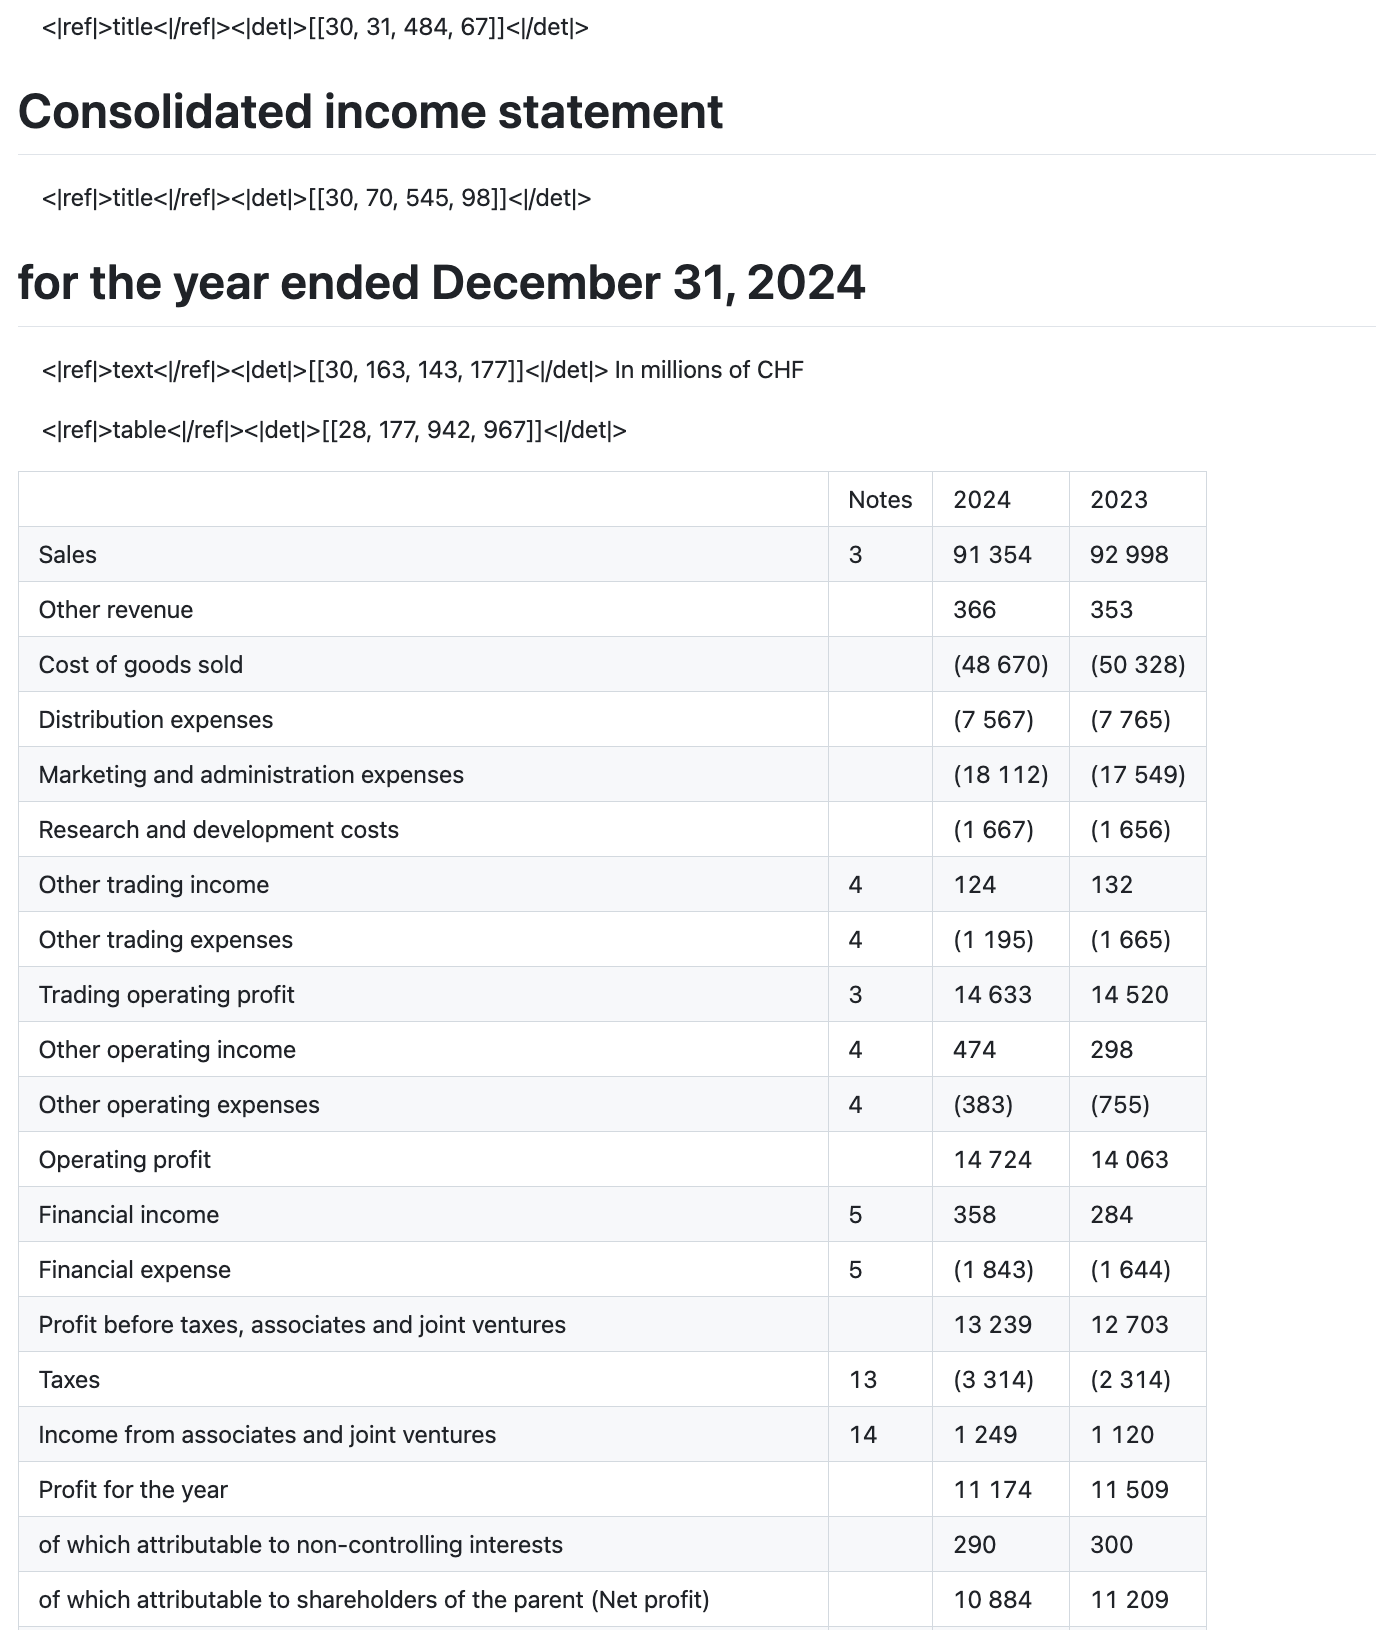

In [7]:
from IPython.display import Image, display

# For an image uploaded to your Colab session's filesystem
display(Image('/content/your/deepseek-ocr-md-gen.png'))

## Recognition

In [8]:
# prompt = "<image>\nFree OCR. "
prompt = "<image>\nLocate <|ref|>Operating profit of 2024<|/ref|> in the image. "
image_file = '/content/your/deepseek-ocr-test.png'

output_path = 'your/output/dir'
# infer(self, tokenizer, prompt='', image_file='', output_path = ' ', base_size = 1024, image_size = 640, crop_mode = True, test_compress = False, save_results = False):

# Tiny: base_size = 512, image_size = 512, crop_mode = False
# Small: base_size = 640, image_size = 640, crop_mode = False
# Base: base_size = 1024, image_size = 1024, crop_mode = False
# Large: base_size = 1280, image_size = 1280, crop_mode = False

# Gundam: base_size = 1024, image_size = 640, crop_mode = True

res = model.infer(tokenizer, prompt=prompt, image_file=image_file, output_path = output_path, base_size = 1024, image_size = 640, crop_mode=True, save_results = True, test_compress = False)


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
<|ref|>Operating profit of 2024<|/ref|><|det|>[[20, 6, 972, 970]]<|/det|>
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 1/1 [00:00<00:00, 7928.74it/s]


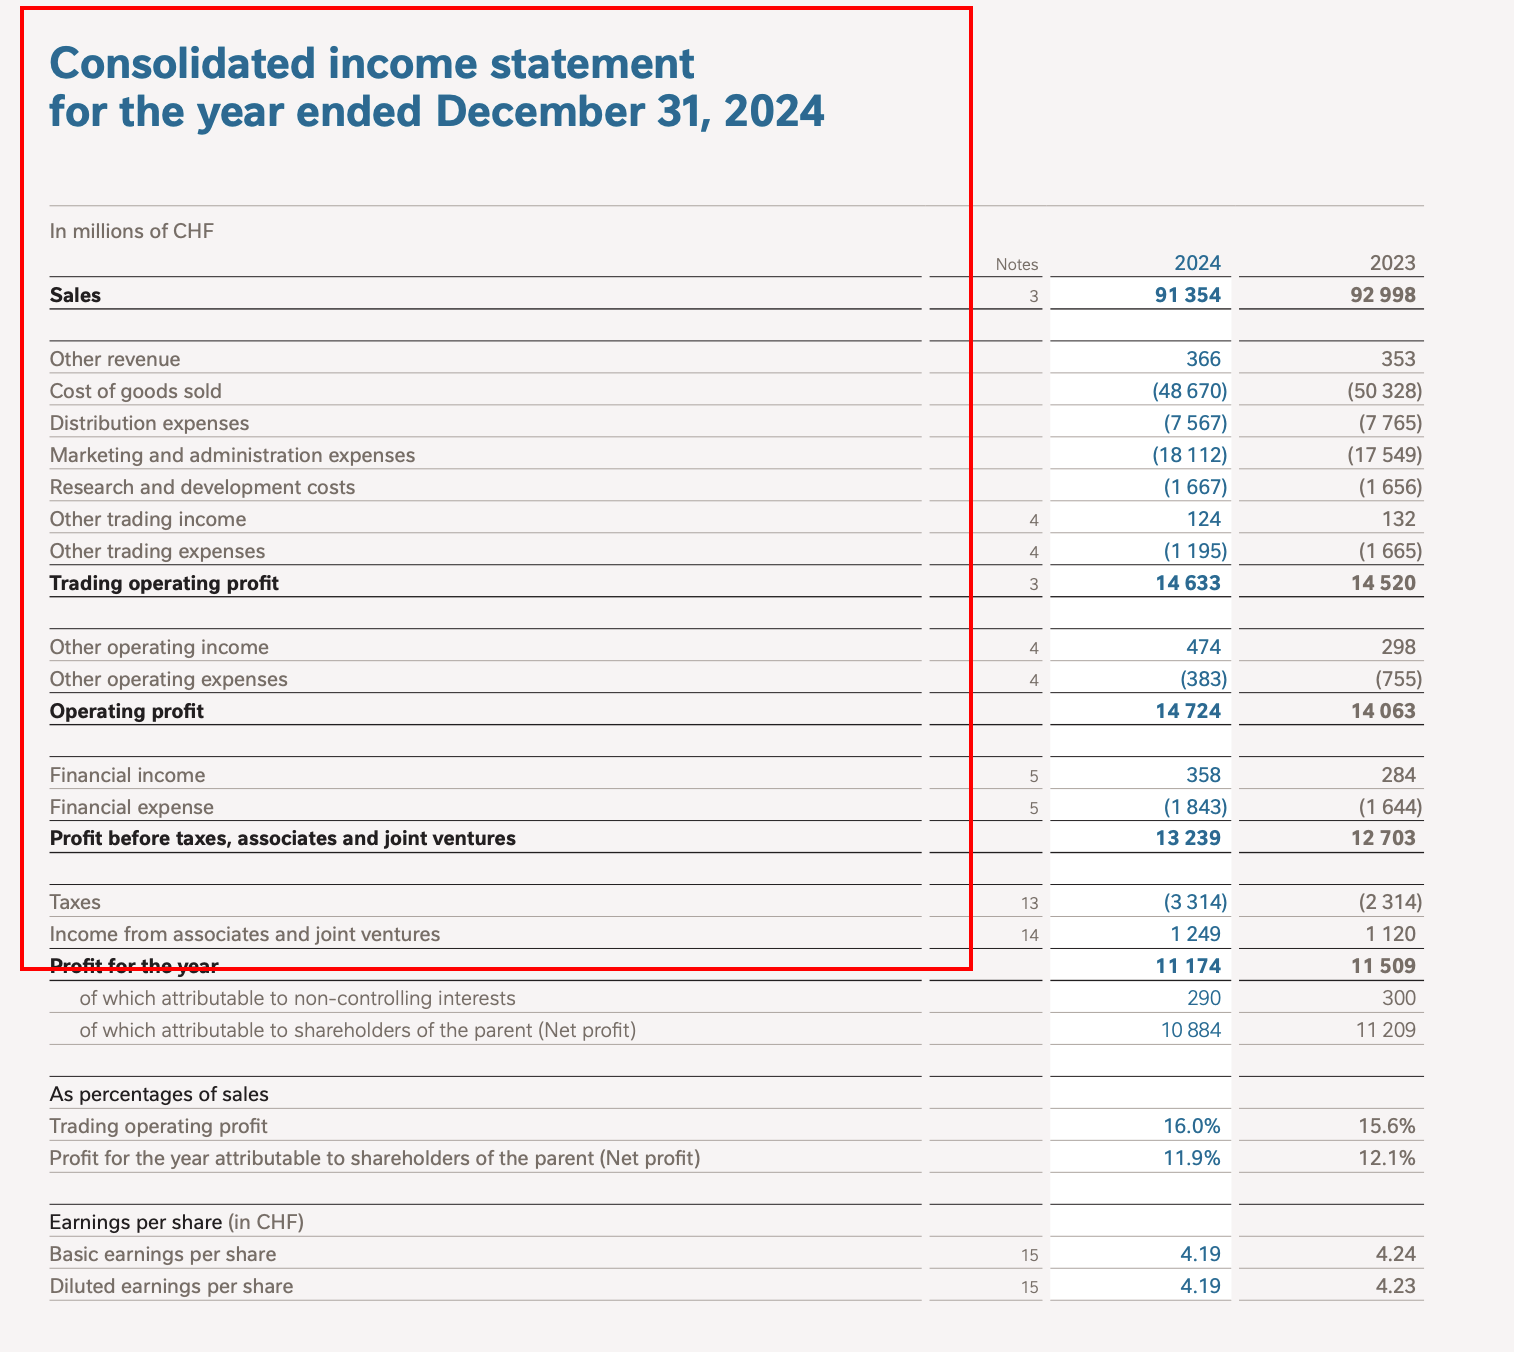

In [9]:
from PIL import Image, ImageDraw
from IPython.display import display

img = Image.open(image_file)
draw = ImageDraw.Draw(img)

box = (20, 6, 972, 970)
draw.rectangle(box, outline="red", width=4)

display(img)


In [10]:
# prompt = "<image>\nFree OCR. "
prompt = "<image>\nLocate <|ref|>Operating profit of 2024<|/ref|> in the image. "
image_file = '/content/your/deepseek-ocr-test.png'

output_path = 'your/output/dir'
# infer(self, tokenizer, prompt='', image_file='', output_path = ' ', base_size = 1024, image_size = 640, crop_mode = True, test_compress = False, save_results = False):

# Tiny: base_size = 512, image_size = 512, crop_mode = False
# Small: base_size = 640, image_size = 640, crop_mode = False
# Base: base_size = 1024, image_size = 1024, crop_mode = False
# Large: base_size = 1280, image_size = 1280, crop_mode = False

# Gundam: base_size = 1024, image_size = 640, crop_mode = True

res = model.infer(tokenizer, prompt=prompt, image_file=image_file, output_path = output_path, base_size = 1024, image_size = 1024, crop_mode=False, save_results = True, test_compress = False)


<|ref|>Operating profit of 2024<|/ref|><|det|>[[24, 61, 946, 970]]<|/det|>
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 1/1 [00:00<00:00, 8388.61it/s]


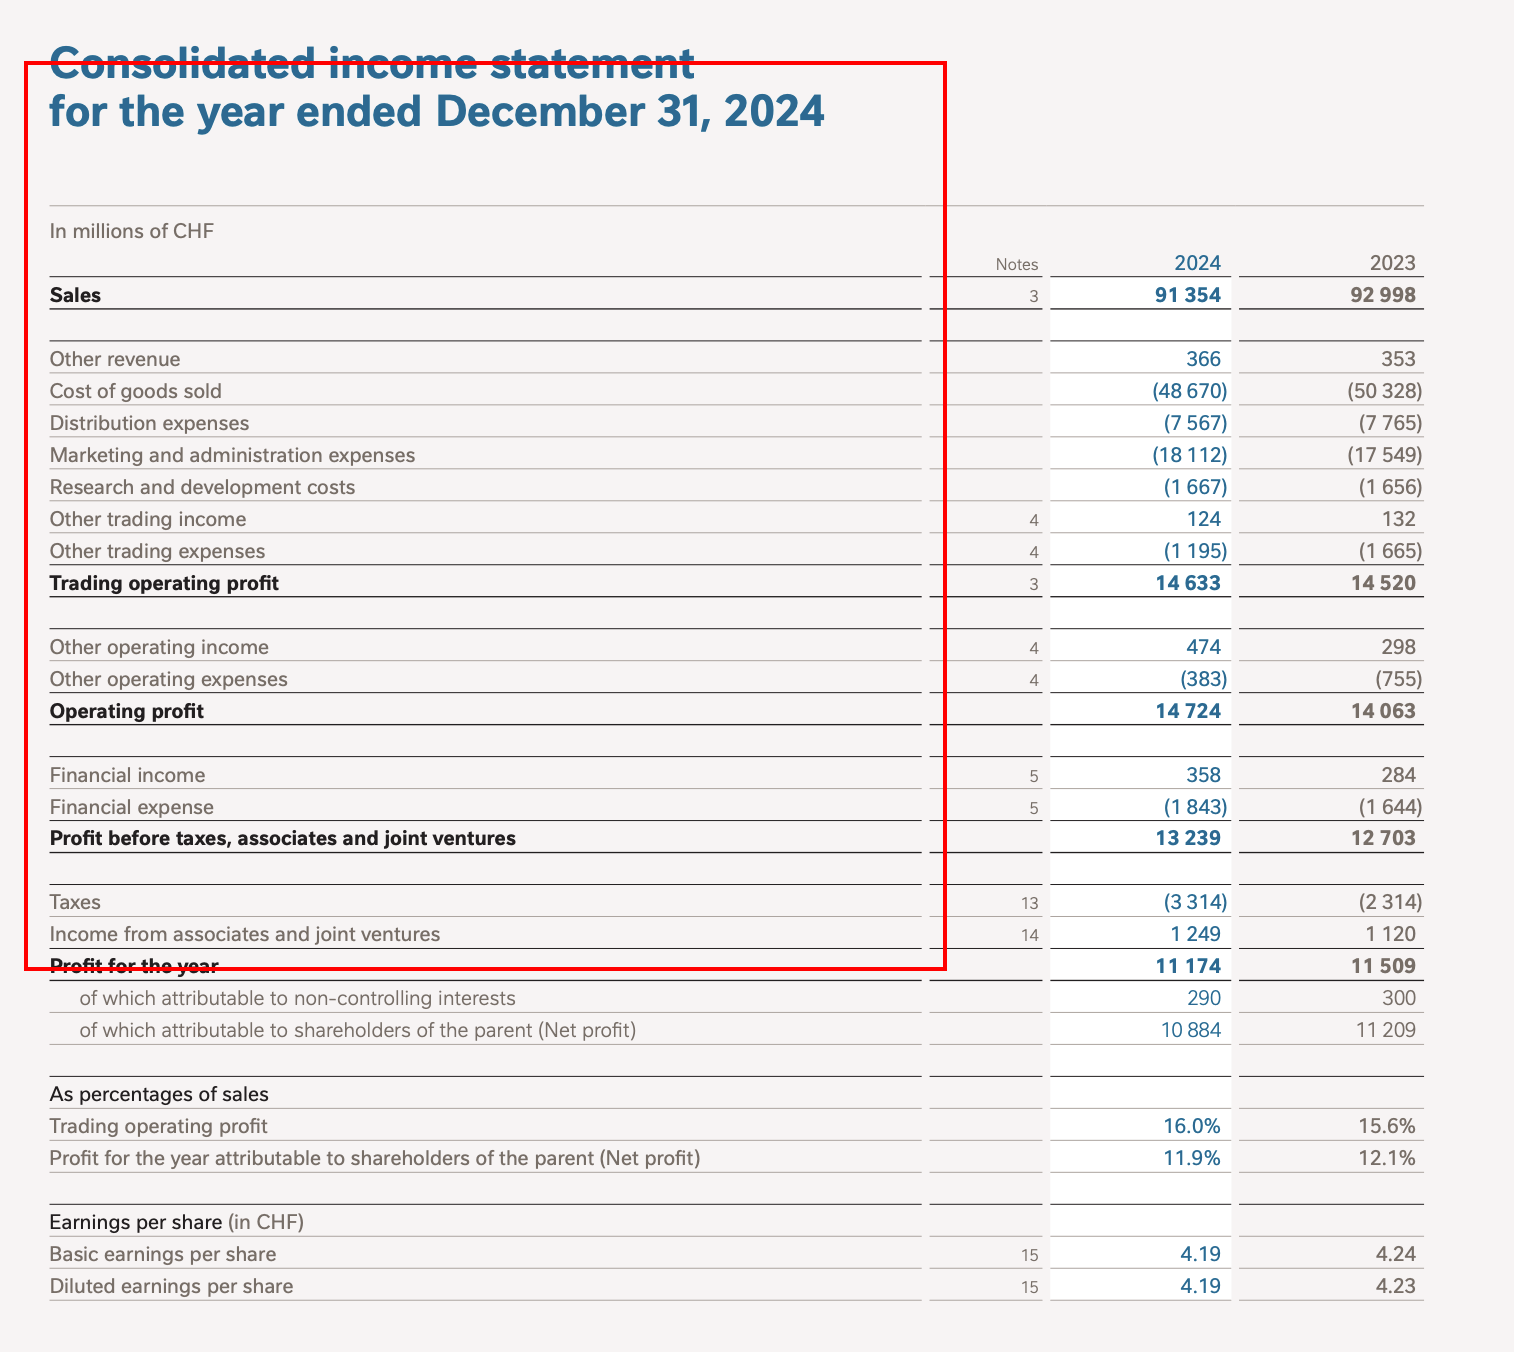

In [11]:
from PIL import Image, ImageDraw
from IPython.display import display

img = Image.open(image_file)
draw = ImageDraw.Draw(img)

box = (24, 61, 946, 970)
draw.rectangle(box, outline="red", width=4)

display(img)


Bounding box attempts wrong both the time? Maybe Deepseek is cropping in a different way, Read what it outputted below

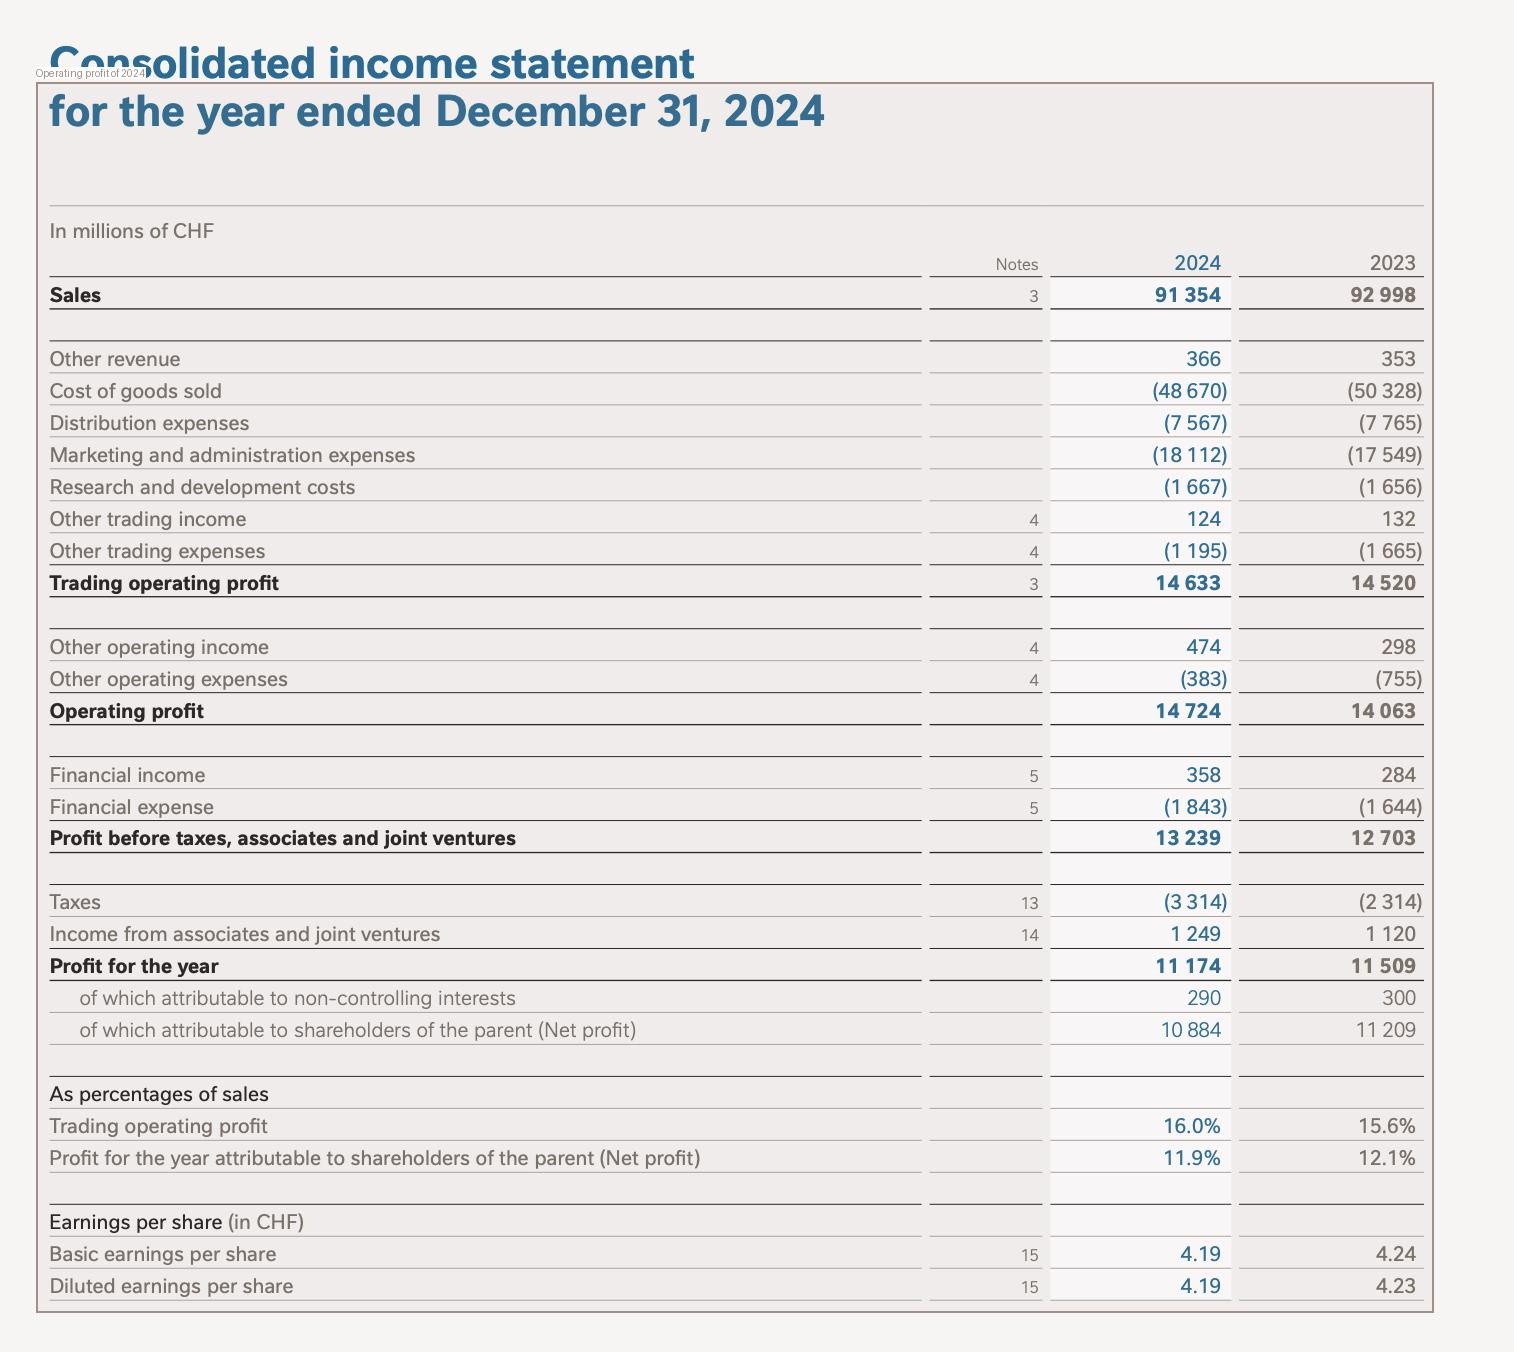

In [12]:
# This is what it saved in the output dir

from IPython.display import Image, display

# For an image uploaded to your Colab session's filesystem
display(Image('/content/your/output/dir/result_with_boxes.jpg'))

Very wide box to capture?

<|ref|>Operating profit<|/ref|><|det|>[[26, 150, 950, 967]]<|/det|>
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 1/1 [00:00<00:00, 5309.25it/s]


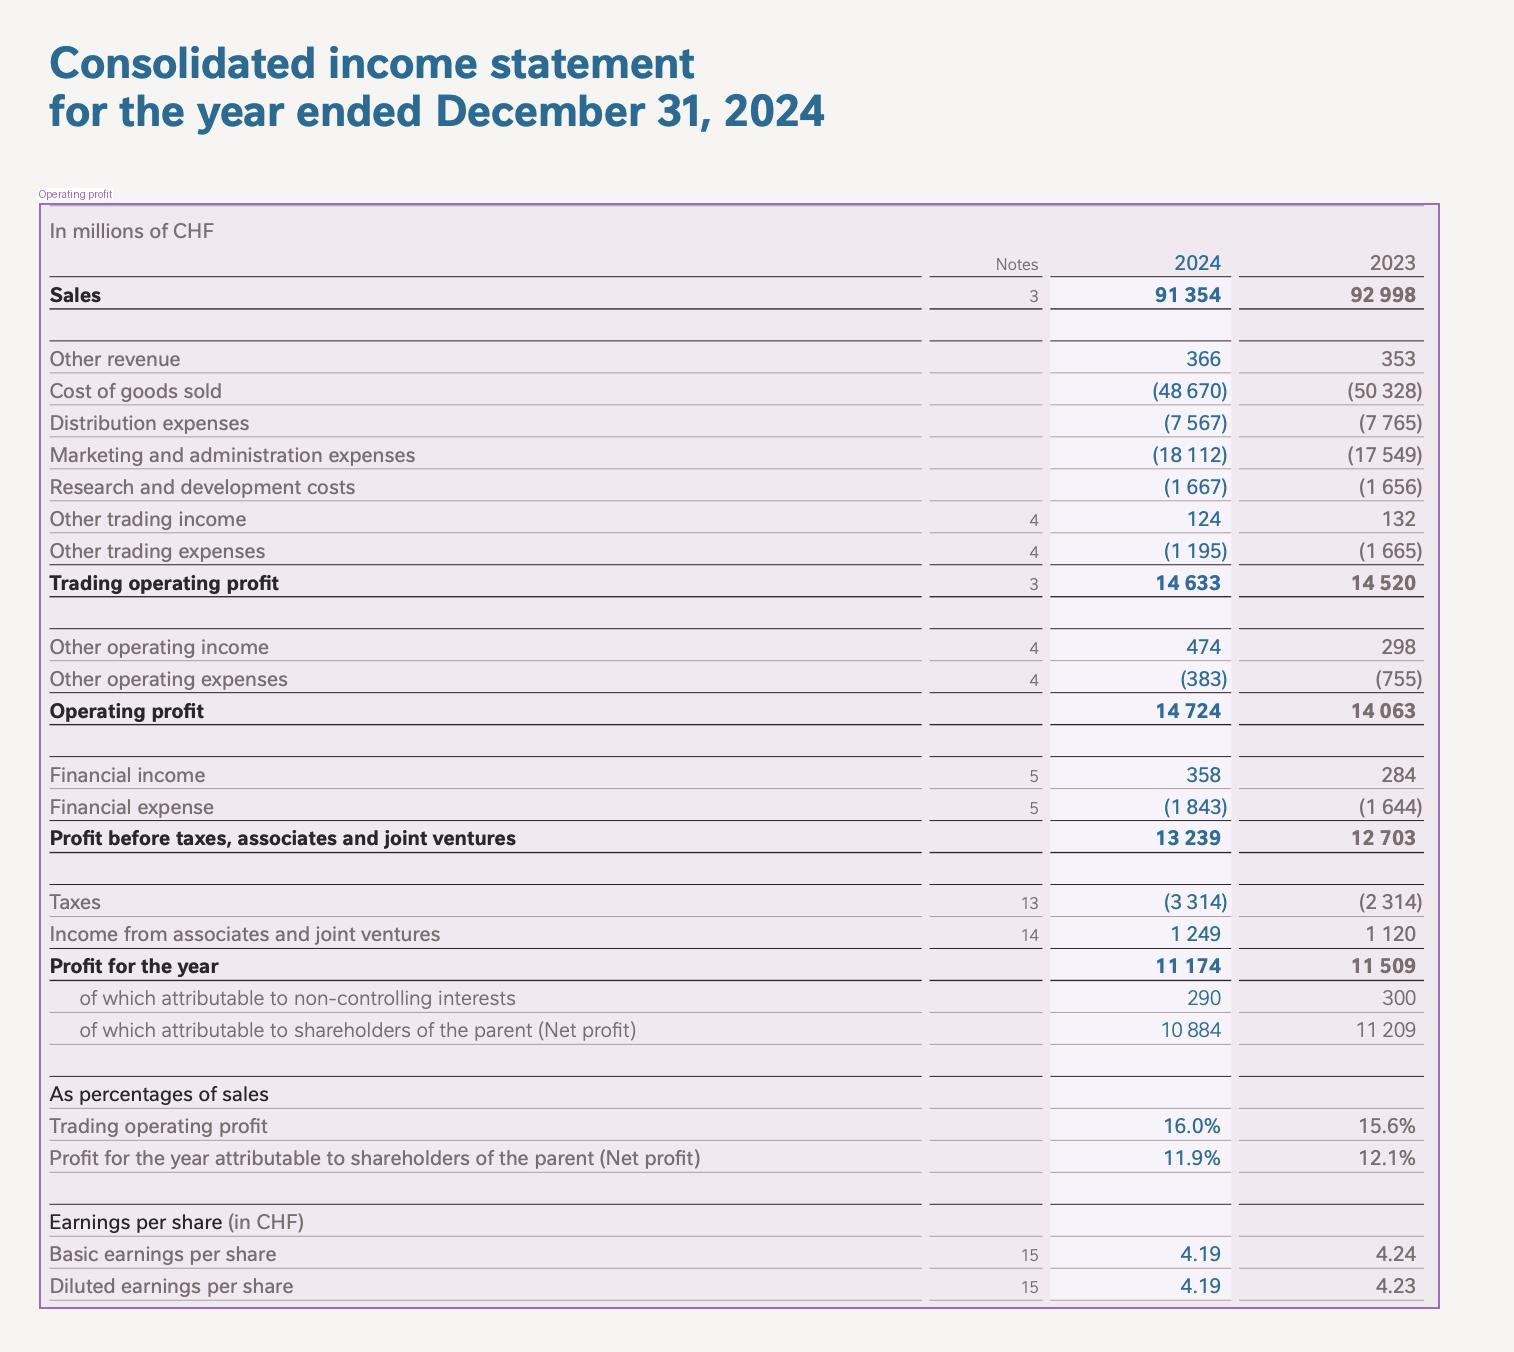

In [18]:
# prompt = "<image>\nFree OCR. "
prompt = (
    "Recognition: <image>\n"
    "Locate <|ref|>Operating profit<|/ref|> in the image."
)

image_file = '/content/your/deepseek-ocr-test.png'

output_path = 'your/output/dir'
# infer(self, tokenizer, prompt='', image_file='', output_path = ' ', base_size = 1024, image_size = 640, crop_mode = True, test_compress = False, save_results = False):

# Tiny: base_size = 512, image_size = 512, crop_mode = False
# Small: base_size = 640, image_size = 640, crop_mode = False
# Base: base_size = 1024, image_size = 1024, crop_mode = False
# Large: base_size = 1280, image_size = 1280, crop_mode = False

# Gundam: base_size = 1024, image_size = 640, crop_mode = True

res = model.infer(tokenizer, prompt=prompt, image_file=image_file, output_path = output_path, base_size = 1024, image_size = 1024, crop_mode=False, save_results = True, test_compress = False)

# This is what it saved in the output dir

from IPython.display import Image, display

# For an image uploaded to your Colab session's filesystem
display(Image('/content/your/output/dir/result_with_boxes.jpg'))


<|ref|>14 724<|/ref|><|det|>[[725, 0, 997, 997]]<|/det|>
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 1/1 [00:00<00:00, 8081.51it/s]


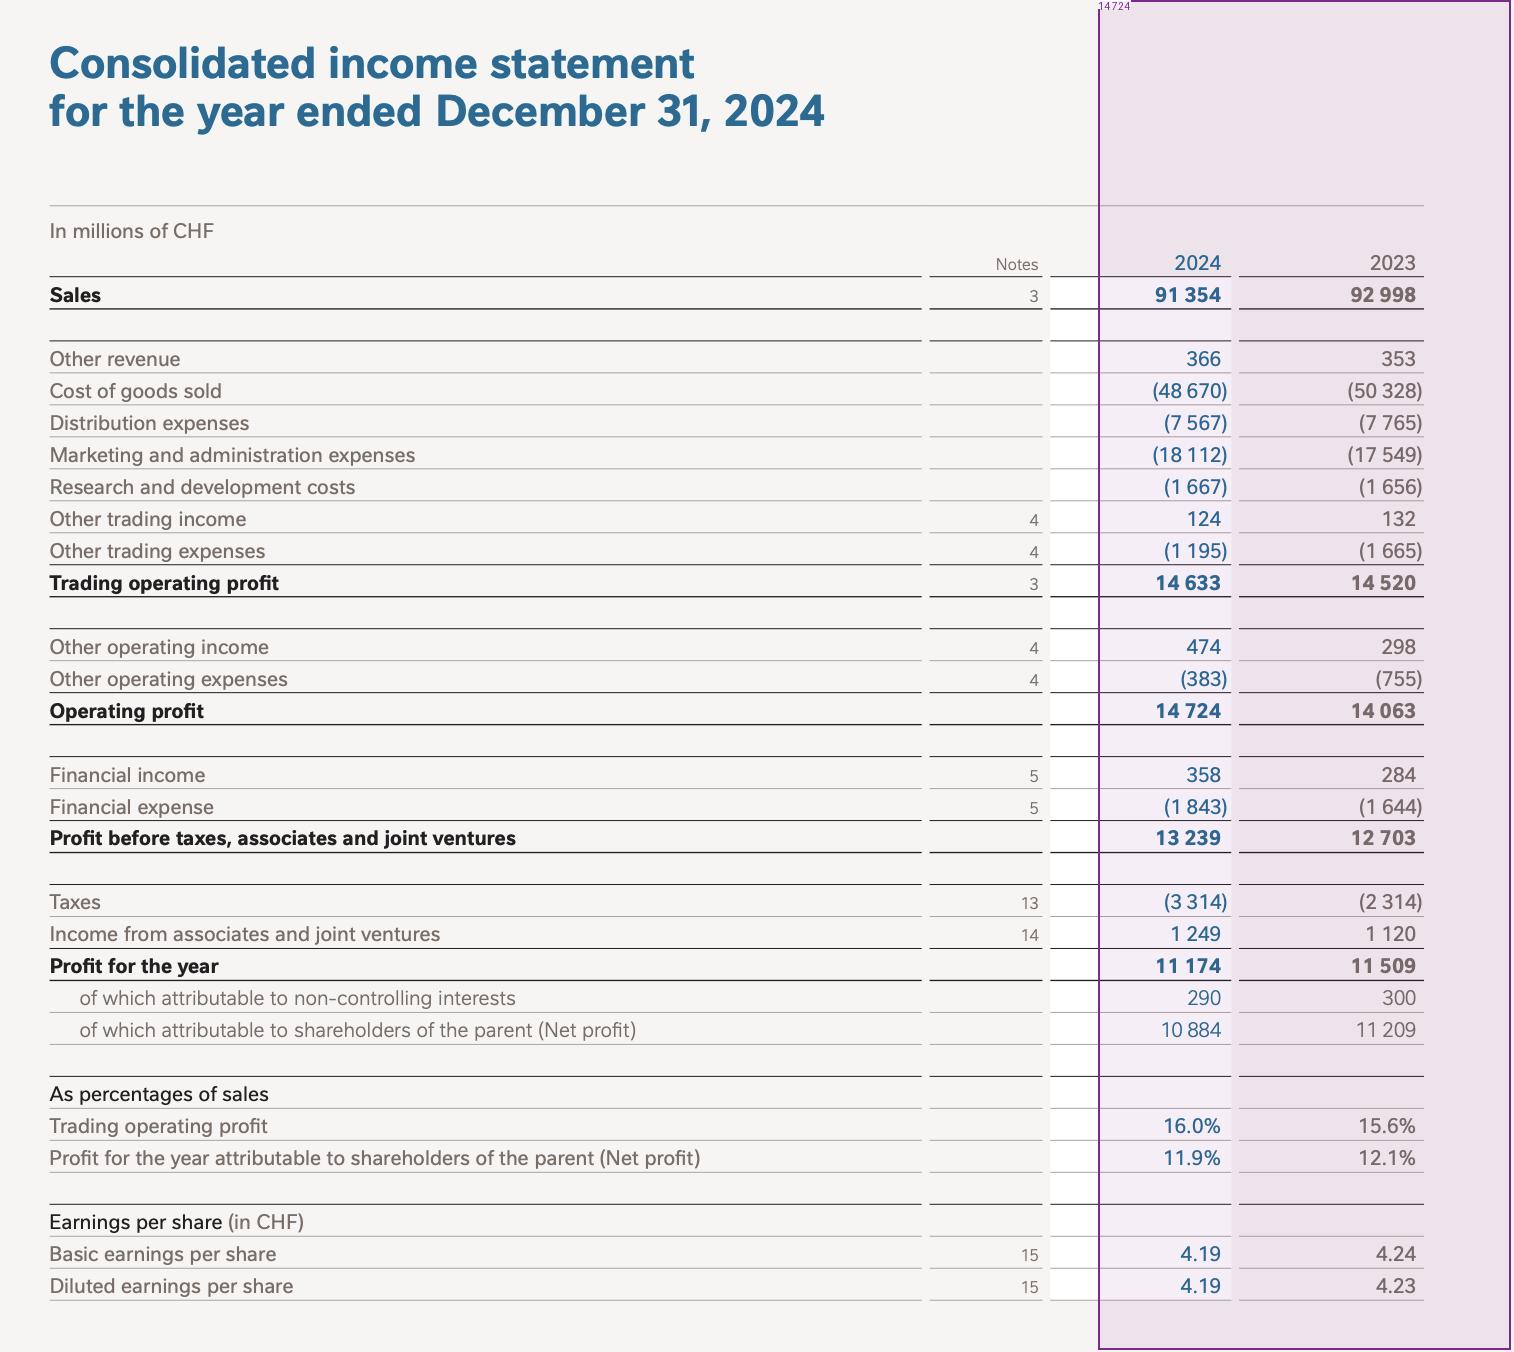

In [21]:
prompt = "Recognition: <image>\nLocate <|ref|>14 724<|/ref|> in the image."

image_file = '/content/your/deepseek-ocr-test.png'

output_path = 'your/output/dir'
# infer(self, tokenizer, prompt='', image_file='', output_path = ' ', base_size = 1024, image_size = 640, crop_mode = True, test_compress = False, save_results = False):

# Tiny: base_size = 512, image_size = 512, crop_mode = False
# Small: base_size = 640, image_size = 640, crop_mode = False
# Base: base_size = 1024, image_size = 1024, crop_mode = False
# Large: base_size = 1280, image_size = 1280, crop_mode = False

# Gundam: base_size = 1024, image_size = 640, crop_mode = True

res = model.infer(tokenizer, prompt=prompt, image_file=image_file, output_path = output_path, base_size = 1024, image_size = 1024, crop_mode=False, save_results = True, test_compress = False)

# This is what it saved in the output dir

from IPython.display import Image, display

# For an image uploaded to your Colab session's filesystem
display(Image('/content/your/output/dir/result_with_boxes.jpg'))

Overall bounding box is correct but very general and not useful

## Describe image

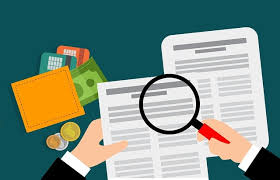

In [13]:
from IPython.display import Image, display

# For an image uploaded to your Colab session's filesystem
display(Image('/content/your/fin-image.jpeg'))

In [14]:
# prompt = "<image>\nFree OCR. "
prompt = "<image>\nDescribe this image in detail. "
image_file = '/content/your/fin-image.jpeg'

output_path = 'your/output/dir'
# infer(self, tokenizer, prompt='', image_file='', output_path = ' ', base_size = 1024, image_size = 640, crop_mode = True, test_compress = False, save_results = False):

# Tiny: base_size = 512, image_size = 512, crop_mode = False
# Small: base_size = 640, image_size = 640, crop_mode = False
# Base: base_size = 1024, image_size = 1024, crop_mode = False
# Large: base_size = 1280, image_size = 1280, crop_mode = False

# Gundam: base_size = 1024, image_size = 640, crop_mode = True

res = model.infer(tokenizer, prompt=prompt, image_file=image_file, output_path = output_path, base_size = 1024, image_size = 1024, crop_mode=False, save_results = True, test_compress = False)


A pair of hands holding a magnifying glass over a newspaper. The newspaper has a headline that reads "The World's Worst Banker". There is a stack of money next to the newspaper. The background is green. The image is in a cartoon style.
===============save results:===============


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


Overall description seems fine, but it found the heading on the news paper as "The World's Worst Banker" which is not visible

In [22]:
!pip install nbstripout
!nbstripout --install

fatal: --local can only be used inside a git repository
Installation failed: not a git repository!
